In [54]:
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import defaultdict

In [55]:
def adjust_labels(labels, max_width=20):
    """ Ajusta os rótulos inserindo quebras de linha de forma inteligente. """
    new_labels = []
    for label in labels:
        words = label.split("/")  # Divide o texto nas barras
        lines = []
        current_line = ''
        for word in words:
            for subword in textwrap.wrap(word, width=max_width):
                if current_line and len(current_line) + len(subword) > max_width:
                    lines.append(current_line.strip())
                    current_line = subword
                elif current_line:
                    current_line += ' ' + subword
                else:
                    current_line = subword
        if current_line:
            lines.append(current_line.strip())
        wrapped_label = '\n'.join(lines)
        new_labels.append(wrapped_label)
    return new_labels

In [56]:
file = 'data.csv'
data = pd.read_csv(file)

data.head()

,Carimbo de data/hora,Anos de Experiência,Tamanho Médio da Equipe,Tempo de Mercado da Startup,Cargo,Fonte de Requisitos,Análise de Documentos,Brainstorming,Entrevistas,Observação,...,Testes de Usuário,Repetição da Descoberta,Esse processo é feito mais de uma vez?,Frequência de solicitações de mudança,Origem das solicitações de mudança,Metodologia de gerenciamento,Criterios de análise de solicitação de mudança,Critérios Dimensões,Consequências da solicitação de mudanças,Comentários
0,09/11/2023 11:29:59,18,3,5,CTO,"Clientes, Time de Marketing, Time de Produto",Sempre,Frequentemente,Sempre,Às Vezes,...,Às Vezes,Frequentemente,Sim,Sempre,"Desenvolvedores, Product Owners, Stakeholders,...","Kanban, Scrum","Contrato, Custo, Prazos","Contrato, Custos, Prazos","Análise de Impacto, Avaliação de Risco, Implem...",Foquei as respostas nos produtos de software q...
1,23/11/2023 09:35:08,3,13,3,Product Owner,"Usuários, Time de Desenvolvimento, Time de Des...",Sempre,Sempre,Frequentemente,Sempre,...,Frequentemente,Frequentemente,Sim,Raramente,Product Owners,"Kanban, Scrum",Não há critérios específicos pois raramente ac...,"Escopo, Valor para o Negócio, Necessidade do C...",Avaliação de Risco,NaN
2,23/11/2023 09:39:45,2,4,2,Product Manager,Stakeholders,Às Vezes,Sempre,Frequentemente,Frequentemente,...,Sempre,Sempre,Sim,Raramente,"Stakeholders, Usuários Finais",Scrum,Mudança no negócio,Valor para o Negócio,"Revisão do Projeto, Revisão da Sprint",NaN
3,23/11/2023 10:06:54,3,5,2,Product Manager,Diretoria,Sempre,Às Vezes,Frequentemente,Sempre,...,Às Vezes,Às Vezes,Às vezes,Sempre,Stakeholders,Scrum,Análise de Indicadores,Métricas do Negócio,"Análise de Impacto, Revisão da Sprint, Impleme...",NaN
4,28/11/2023 09:43:29,20,20,60,Analista de Sistemas,"Time de Operações, Time Comercial, Time Financ...",Às Vezes,Frequentemente,Sempre,Frequentemente,...,Às Vezes,Às Vezes,Às vezes,Frequentemente,Desenvolvedores,Scrum,"Prazos, Custo, Viabilidade","Prazos, Custos, Prazos","Análise de Impacto, Avaliação de Risco, Revisã...",A mudanças não necessárias e precisam ser aval...


In [57]:
data.columns

Index(['Carimbo de data/hora', 'Anos de Experiência',
       'Tamanho Médio da Equipe', 'Tempo de Mercado da Startup', 'Cargo',
       'Fonte de Requisitos', 'Análise de Documentos', 'Brainstorming',
       'Entrevistas', 'Observação', 'Prototipação', 'Surveys', 'Workshops',
       'Especificação de Requisitos', 'Validação de Requisitos',
       'Contato com stakeholder durante descoberta', 'Ciclos de Feedback',
       'Testes de Usuário', 'Repetição da Descoberta',
       'Esse processo é feito mais de uma vez?',
       'Frequência de solicitações de mudança',
       'Origem das solicitações de mudança', 'Metodologia de gerenciamento',
       'Criterios de análise de solicitação de mudança', 'Critérios Dimensões',
       'Consequências da solicitação de mudanças', 'Comentários'],
      dtype='object')

In [58]:
tecnicas_descoberta = ['Análise de Documentos',
                       'Brainstorming',
                       'Entrevistas',
                       'Observação',
                       'Prototipação',
                       'Surveys',
                       'Workshops']

tecnicas_especificacao = ['Especificação de Requisitos']

tecnicas_validacao = ['Validação de Requisitos']

### Fontes de Requisitos

In [59]:
fontes = data['Fonte de Requisitos'].str.split(', ')
fontes_contagem = fontes.explode().value_counts()
# fontes_contagem.to_csv('fontes_contagem.csv')
fontes_contagem

Fonte de Requisitos
Usuários                     8
Time de Produto              3
Time de Desenvolvimento      3
Diretoria                    3
Times Internos               2
Parceiros Integrados         2
Clientes                     1
Leads                        1
Time de Negócios             1
Produtores Rurais            1
Benchmarking Tendência       1
Benchmarking Concorrência    1
Time Comercial               1
Time Administrativo          1
Time Financeiro              1
Time de Marketing            1
Time de Operações            1
Stakeholders                 1
Time de Design               1
Dados de Uso                 1
Name: count, dtype: int64

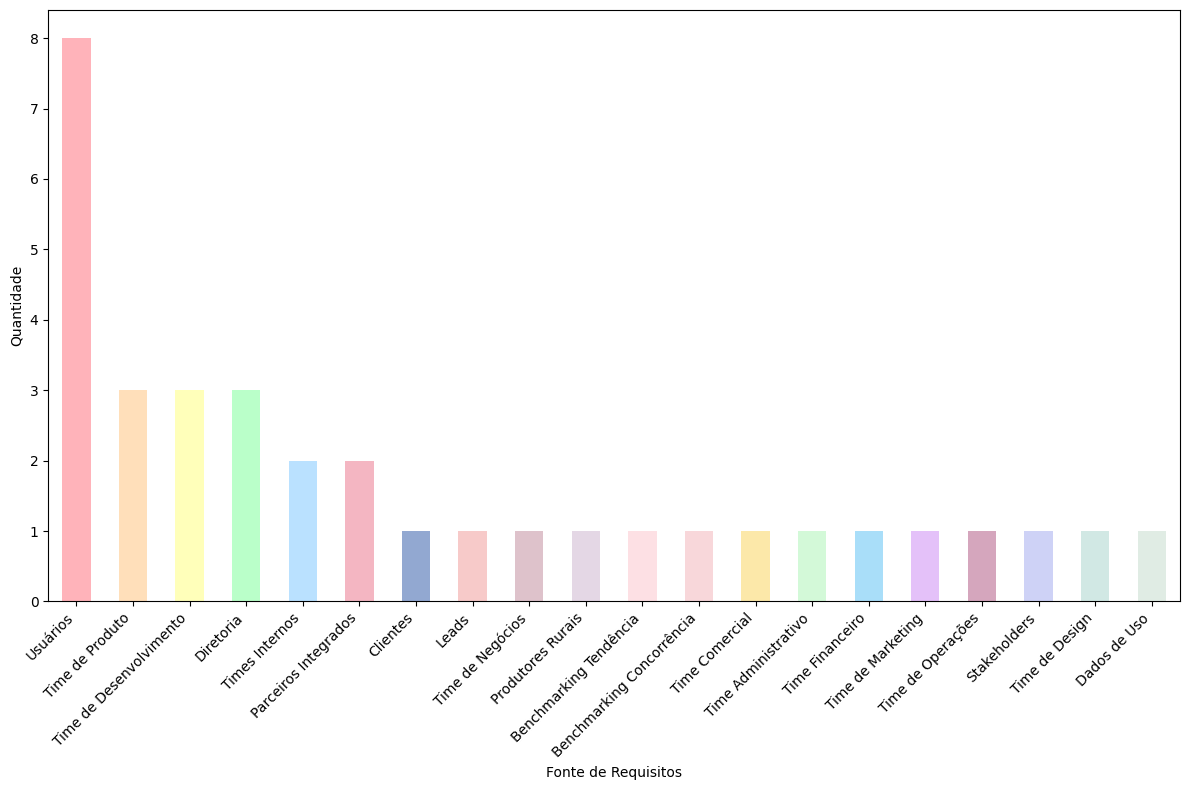

In [60]:
pastel_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff',
                 '#f4b6c2', '#92a8d1', '#f7cac9', '#dec2cb', '#e4d7e5',
                 '#fde0e4', '#f8d7da', '#fce8a9', '#d3f9d8', '#a9def9',
                 '#e4c1f9', '#d5a6bd', '#ced2f6', '#d1e8e4', '#e0ece4']

color_cycle = pastel_colors * (len(fontes_contagem) // len(pastel_colors) + 1)
colors = color_cycle[:len(fontes_contagem)]

plt.figure(figsize=(12, 8))
fontes_contagem.plot(kind='bar', color=colors)
# plt.title('Frequência de Técnicas de Fontes de Requisitos')
# plt.xlabel('Técnicas')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('plots/q3/fontes.png', transparent=True)
plt.show()

### Descoberta & Análise

In [61]:
column_order = ['Sempre',
                'Frequentemente',  
                'Às Vezes', 
                'Raramente', 
                'Nunca']

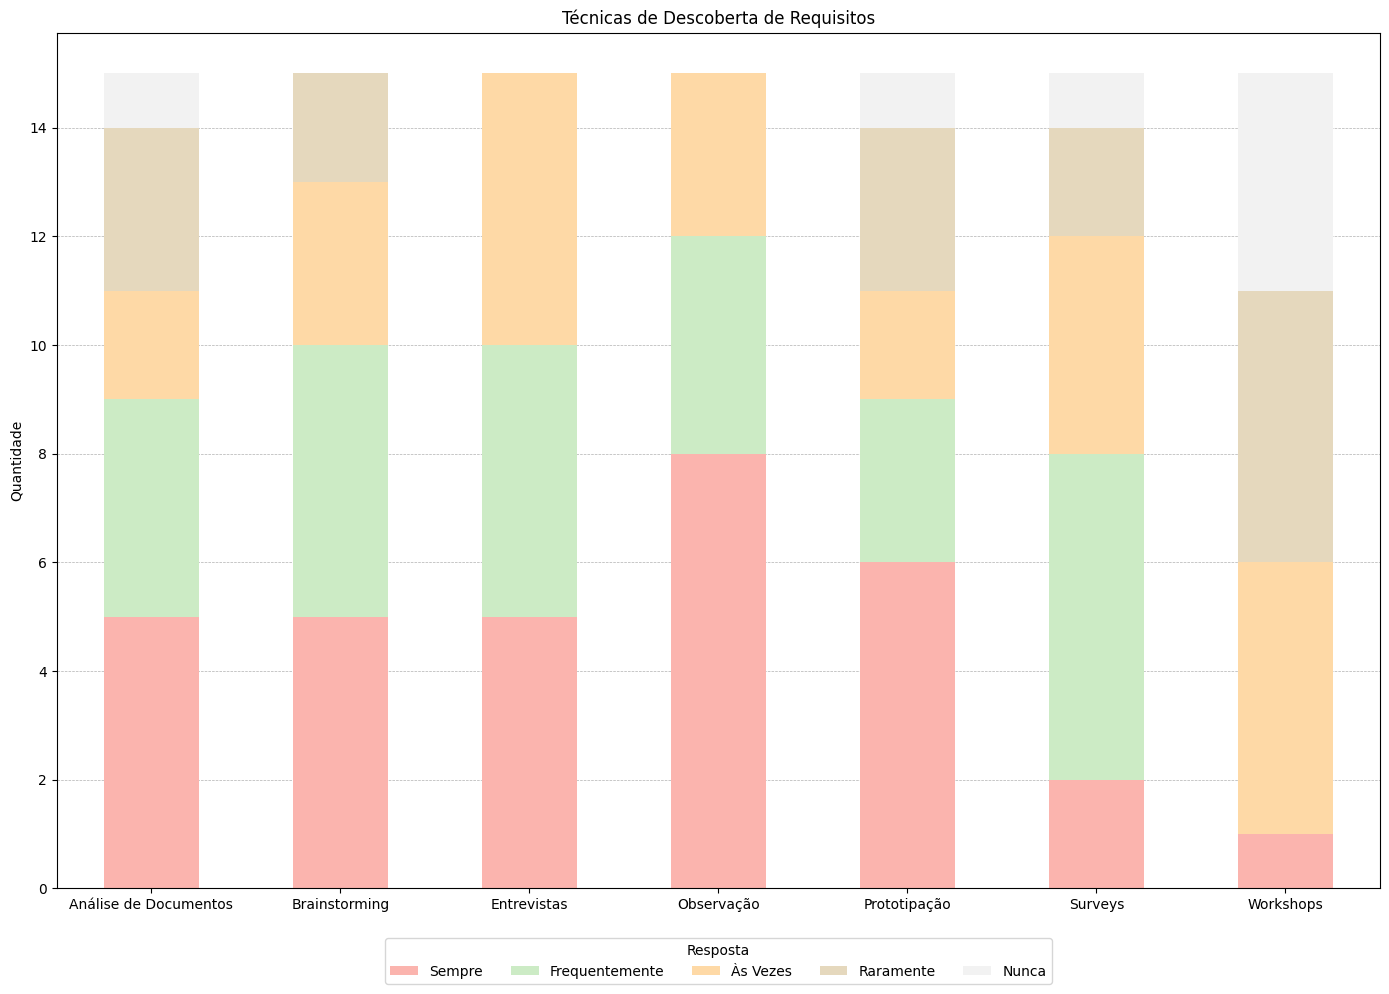

In [62]:
likert_data = data[tecnicas_descoberta].apply(pd.Series.value_counts).fillna(0).transpose()
likert_data.columns = [f'{col}' for col in likert_data.columns]
likert_data = likert_data[column_order]

xticklabels = adjust_labels(tecnicas_descoberta, max_width=12)  # ajuste 'max_width' conforme necessário

fig, ax = plt.subplots(figsize=(14, 10))
likert_data.plot(kind='bar', stacked=True, ax=ax, colormap='Pastel1')
ax.set_title('Técnicas de Descoberta de Requisitos')
# ax.set_xlabel('Técnicas')
ax.set_ylabel('Quantidade')

ax.yaxis.grid(True, linestyle='dashed', linewidth=0.5)
ax.set_axisbelow(True)

ax.legend(title='Resposta', loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(likert_data.columns))

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
plt.tight_layout()
plt.savefig('plots/q1/discovery.png', transparent=True)

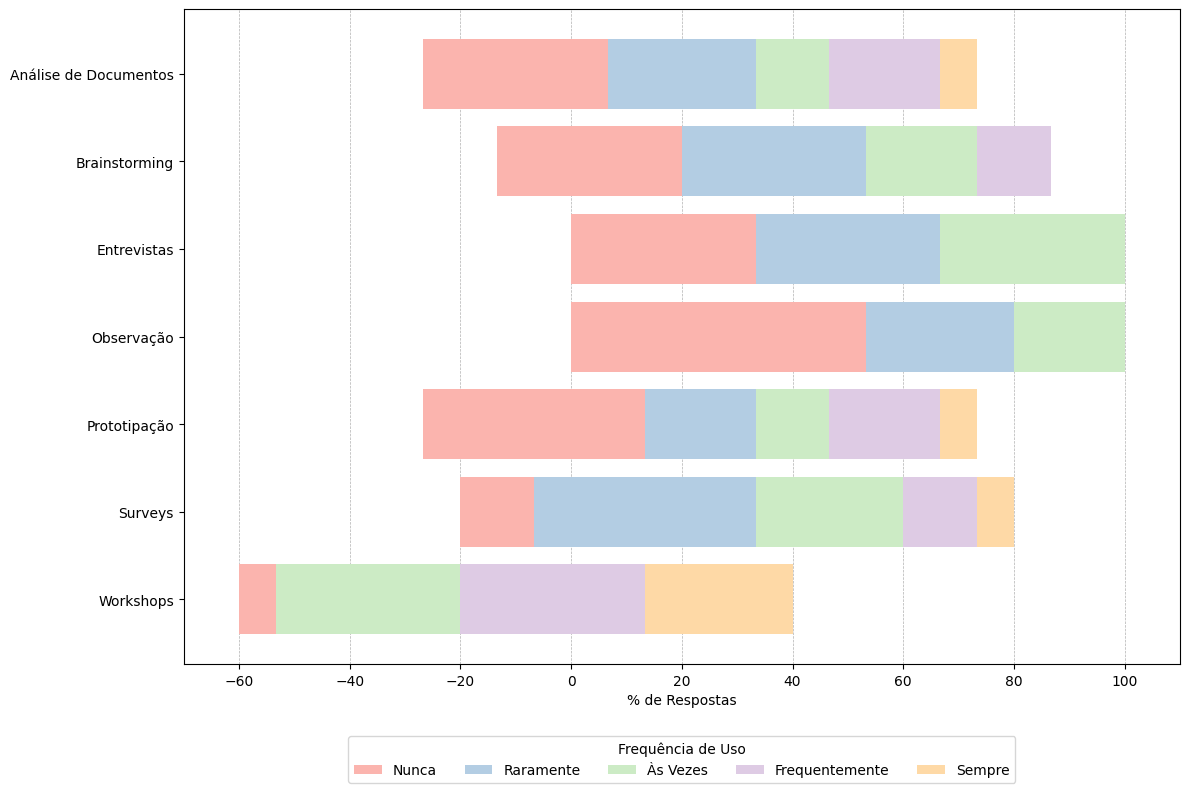

In [63]:
data_subset = data[tecnicas_descoberta]

# Contando as ocorrências de cada categoria de resposta corretamente
count_data = data_subset.apply(lambda x: x.value_counts()).fillna(0).T

# Calculando porcentagens
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Definindo as cores pastel para o gráfico
pastel_palette = sns.color_palette("Pastel1", 5)

# Preparando os dados para plotagem divergente
percentage_data['Sum_Negative'] = percentage_data['Nunca'] + percentage_data['Raramente']
percentage_data['Sum_Positive'] = percentage_data['Frequentemente'] + percentage_data['Sempre']
percentage_data['Left'] = -percentage_data['Sum_Negative']

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Lista para armazenar as barras criadas
bars = []

# Plotando cada categoria ajustando as posições
for i, category in enumerate(['Nunca', 'Raramente', 'Às Vezes', 'Frequentemente', 'Sempre'][::-1]):
    bar = ax.barh(percentage_data.index, percentage_data[category], left=percentage_data['Left'], color=pastel_palette[i])
    bars.append(bar)  # Adicionando as barras à lista
    percentage_data['Left'] += percentage_data[category]

labels = ['Nunca', 'Raramente', 'Às Vezes', 'Frequentemente', 'Sempre']
ax.legend([b[0] for b in bars], labels, title="Frequência de Uso", loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

ax.xaxis.grid(True, linestyle='dashed', linewidth=0.5)
ax.set(xlim=[-70, 110], xlabel='% de Respostas')
ax.set_axisbelow(True)

plt.gca().invert_yaxis()  # Inverter o eixo y para ter a primeira entrada no topo
plt.tight_layout()
plt.savefig('plots/q1/divergencia_descoberta.png', transparent=True)
plt.show()

In [64]:
repostas_por_tecnica = likert_data.sum(axis=1)
percentis = likert_data.div(repostas_por_tecnica, axis=0) * 100
percentis = percentis.round(2)
percentis

,Sempre,Frequentemente,Às Vezes,Raramente,Nunca
Análise de Documentos,33.33,26.67,13.33,20.00,6.67
Brainstorming,33.33,33.33,20.00,13.33,0.00
Entrevistas,33.33,33.33,33.33,0.00,0.00
Observação,53.33,26.67,20.00,0.00,0.00
Prototipação,40.00,20.00,13.33,20.00,6.67
Surveys,13.33,40.00,26.67,13.33,6.67
Workshops,6.67,0.00,33.33,33.33,26.67


### Especificação

In [65]:
tecnicas = data['Especificação de Requisitos'].str.split(', ')
tecnicas_contagem = tecnicas.explode().value_counts()

tecnicas_contagem

Especificação de Requisitos
Histórias de Usuário                                     14
Casos de Uso                                             10
Wireframes/Protótipos/Design Comportamental              10
Modelagem de Processos de Negócio                         5
Linguagem Natural                                         4
Lista Estruturada                                         3
Gherkin (BDD)                                             2
Fluxogramas de jornada ou de informações                  1
DoD                                                       1
Similaridade através de imagens da própria plataforma     1
Name: count, dtype: int64

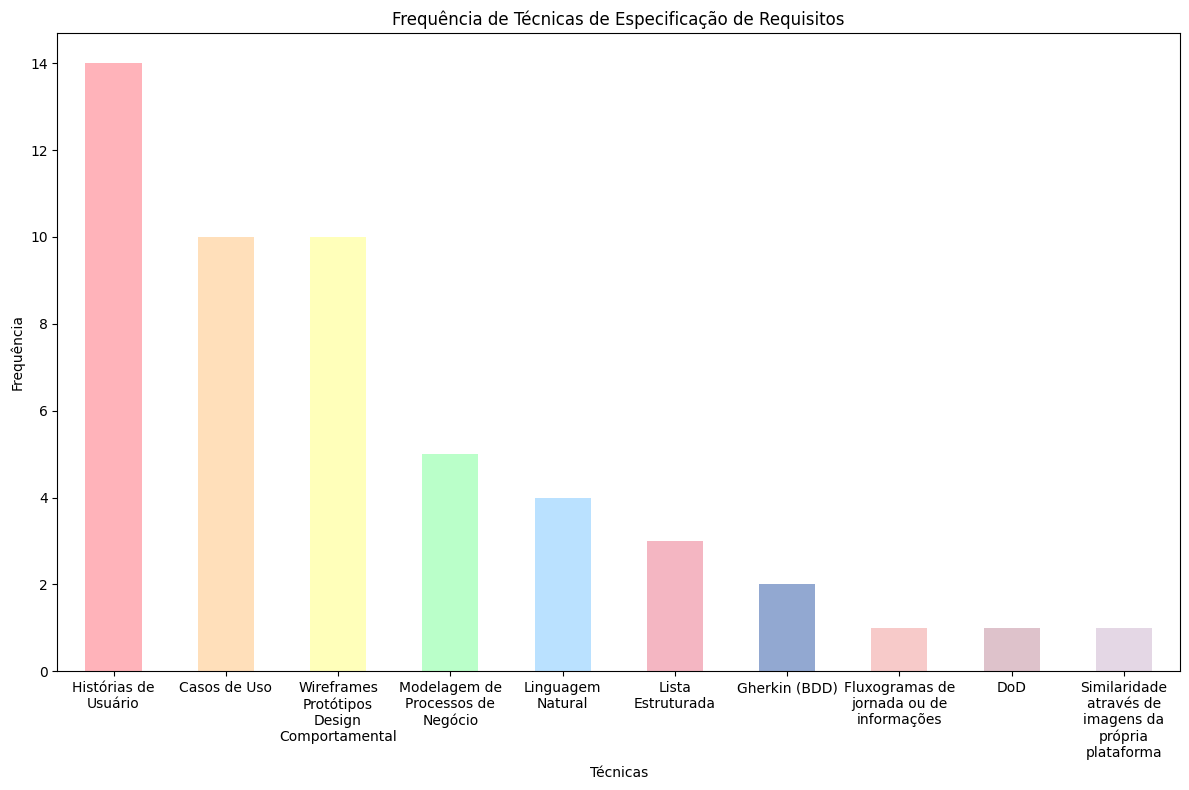

In [66]:
pastel_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff',
                 '#f4b6c2', '#92a8d1', '#f7cac9', '#dec2cb', '#e4d7e5']

color_cycle = pastel_colors * (len(tecnicas_contagem) // len(pastel_colors) + 1)
colors = color_cycle[:len(tecnicas_contagem)]

tecnicas_especificacao_lista = list(tecnicas_contagem.keys())
adjusted_labels = adjust_labels(tecnicas_especificacao_lista, max_width=15)

plt.figure(figsize=(12, 8))
tecnicas_contagem.plot(kind='bar', color=colors)
plt.title('Frequência de Técnicas de Especificação de Requisitos')
plt.xlabel('Técnicas')
plt.ylabel('Frequência')
plt.xticks(ticks=range(len(adjusted_labels)), labels=adjusted_labels, rotation=0, ha='center')
plt.tight_layout()
plt.savefig('plots/q1/especificacao.png', transparent=True)
plt.show()

#### Associacoes Especificação

In [67]:
# Inicializar o dicionário para contar os pares
associacoes = defaultdict(lambda: defaultdict(int))

# Contar cada par em cada resposta
for tecnica in tecnicas:
    tecnica_ordenada = sorted(tecnica)
    for combinacao in combinations(tecnica_ordenada, 2):
        associacoes[combinacao[0]][combinacao[1]] += 1
        associacoes[combinacao[1]][combinacao[0]] += 1  # Contar para ambas direções

# Converter o defaultdict para um dicionário regular para facilitar a leitura
associacoes = {tecnica: dict(counts) for tecnica, counts in associacoes.items()}

# Exibir o resultado
associacoes

{'Casos de Uso': {'Histórias de Usuário': 10,
  'Linguagem Natural': 2,
  'Wireframes/Protótipos/Design Comportamental': 7,
  'DoD ': 1,
  'Fluxogramas de jornada ou de informações': 1,
  'Lista Estruturada': 1,
  'Modelagem de Processos de Negócio': 3,
  'Gherkin (BDD)': 1},
 'Histórias de Usuário': {'Casos de Uso': 10,
  'Linguagem Natural': 4,
  'Wireframes/Protótipos/Design Comportamental': 9,
  'DoD ': 1,
  'Fluxogramas de jornada ou de informações': 1,
  'Lista Estruturada': 3,
  'Modelagem de Processos de Negócio': 5,
  'Gherkin (BDD)': 1,
  'Similaridade através de imagens da própria plataforma': 1},
 'Linguagem Natural': {'Casos de Uso': 2,
  'Histórias de Usuário': 4,
  'Wireframes/Protótipos/Design Comportamental': 3,
  'Modelagem de Processos de Negócio': 1,
  'Gherkin (BDD)': 1,
  'Lista Estruturada': 1,
  'Similaridade através de imagens da própria plataforma': 1},
 'Wireframes/Protótipos/Design Comportamental': {'Casos de Uso': 7,
  'Histórias de Usuário': 9,
  'Linguage

In [68]:
# Supondo que contagem_tecnicas é uma contagem de todas as técnicas únicas
lista_tecnicas = list(tecnicas_contagem.index)
tamanho_matriz = len(lista_tecnicas)
matriz_coocorrencia = np.zeros((tamanho_matriz, tamanho_matriz))

# Criar um mapeamento de índice para as técnicas
indice_tecnica = {tecnica: i for i, tecnica in enumerate(lista_tecnicas)}

# Preencher a matriz com os dados de associação
for tecnica, associacoes in associacoes.items():
    for tecnica_associada, contagem in associacoes.items():
        if tecnica_associada in indice_tecnica:  # Garantir que a técnica associada está na lista
            i, j = indice_tecnica[tecnica], indice_tecnica[tecnica_associada]
            matriz_coocorrencia[i][j] = contagem

# Opcional: Converter a matriz para um DataFrame para uma visualização mais fácil
df_coocorrencia = pd.DataFrame(matriz_coocorrencia, index=lista_tecnicas, columns=lista_tecnicas)

# Exibir a matriz como DataFrame
df_coocorrencia

,Histórias de Usuário,Casos de Uso,Wireframes/Protótipos/Design Comportamental,Modelagem de Processos de Negócio,Linguagem Natural,Lista Estruturada,Gherkin (BDD),Fluxogramas de jornada ou de informações,DoD,Similaridade através de imagens da própria plataforma
Histórias de Usuário,0.0,10.0,9.0,5.0,4.0,3.0,1.0,1.0,1.0,1.0
Casos de Uso,10.0,0.0,7.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
Wireframes/Protótipos/Design Comportamental,9.0,7.0,0.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0
Modelagem de Processos de Negócio,5.0,3.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0
Linguagem Natural,4.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
Lista Estruturada,3.0,1.0,3.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0
Gherkin (BDD),1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Fluxogramas de jornada ou de informações,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
DoD,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
Similaridade através de imagens da própria plataforma,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


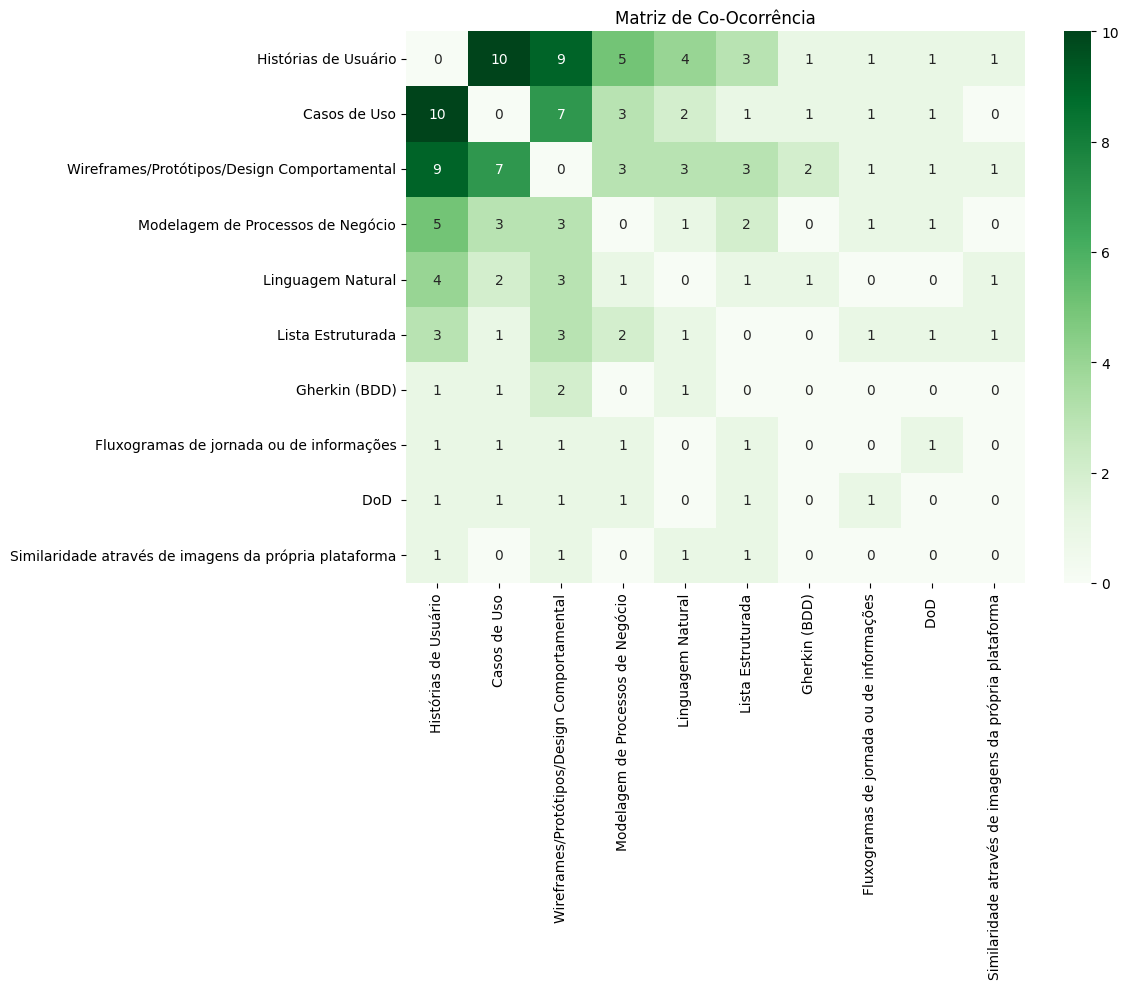

In [69]:
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_coocorrencia, annot=True, fmt=".0f", cmap="Greens", xticklabels=lista_tecnicas, yticklabels=lista_tecnicas)
plt.title("Matriz de Co-Ocorrência")
plt.tight_layout()
plt.savefig('plots/q1/heatmap_especificacao.png', transparent=True)
plt.show()

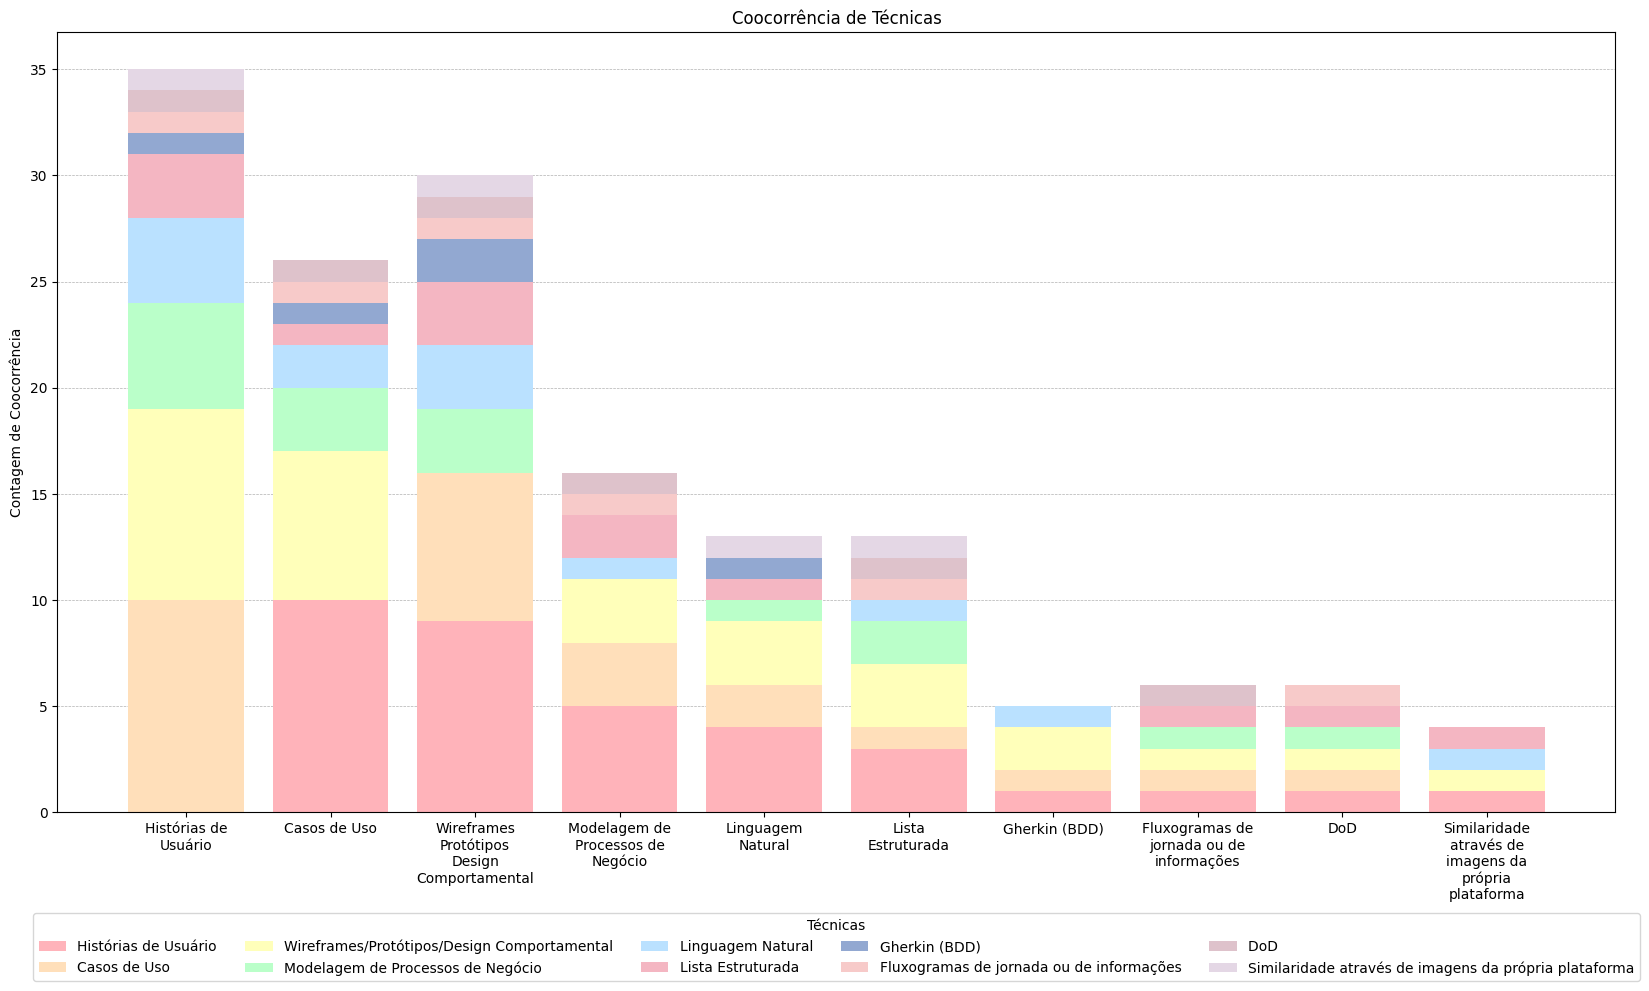

In [70]:
# Supondo que df_coocorrencia seja o DataFrame que contém a matriz de coocorrência
df_coocorrencia = pd.DataFrame(matriz_coocorrencia, index=lista_tecnicas, columns=lista_tecnicas)

# Cores para cada técnica, ajuste para garantir que haja cores suficientes
cores = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff',
         '#f4b6c2', '#92a8d1', '#f7cac9', '#dec2cb', '#e4d7e5'] * ((len(lista_tecnicas) + 9) // 10)

# Preparar o plot
fig, ax = plt.subplots(figsize=(18, 10))
base = np.zeros(len(lista_tecnicas))  # base para as barras empilhadas

tecnicas_especificacao_lista = list(tecnicas_contagem.keys())
adjusted_labels = adjust_labels(tecnicas_especificacao_lista, max_width=15)

# Criar as barras empilhadas para cada técnica
for i, tecnica in enumerate(lista_tecnicas):
    valores = df_coocorrencia.iloc[i, :]  # Valores de coocorrência para a técnica
    ax.bar(adjusted_labels, valores, bottom=base, color=cores[i], label=tecnica)
    base += valores  # Atualizar a base com os valores atuais

# Configurar os detalhes do plot
ax.set_ylabel('Contagem de Coocorrência')
ax.set_title('Coocorrência de Técnicas')

ax.yaxis.grid(True, linestyle='dashed', linewidth=0.5)
ax.set_axisbelow(True)

ax.legend(title="Técnicas", bbox_to_anchor=(0.5, -0.12), loc='upper center', ncol=5)
plt.xticks(rotation=0, ha='center')  # Rotacionar os nomes das técnicas para melhor visualização
plt.tight_layout()  # Ajustar o layout
plt.savefig('plots/q1/coocorrencia_especificacao.png', transparent=True, bbox_inches='tight')
plt.show()  # Mostrar o gráfico

### Validação

In [71]:
tecnicas_validacao = data['Validação de Requisitos'].str.split(', ').dropna()
validacao_contagem = tecnicas_validacao.explode().value_counts()

validacao_contagem

Validação de Requisitos
Demonstração de Protótipo             14
Reuniões                              11
Entrevistas                            8
Walkthrough                            7
Simulações                             6
Inspeção de Requisitos                 4
Checagem Automática                    2
                                       1
Walkthrough para features top down     1
Name: count, dtype: int64

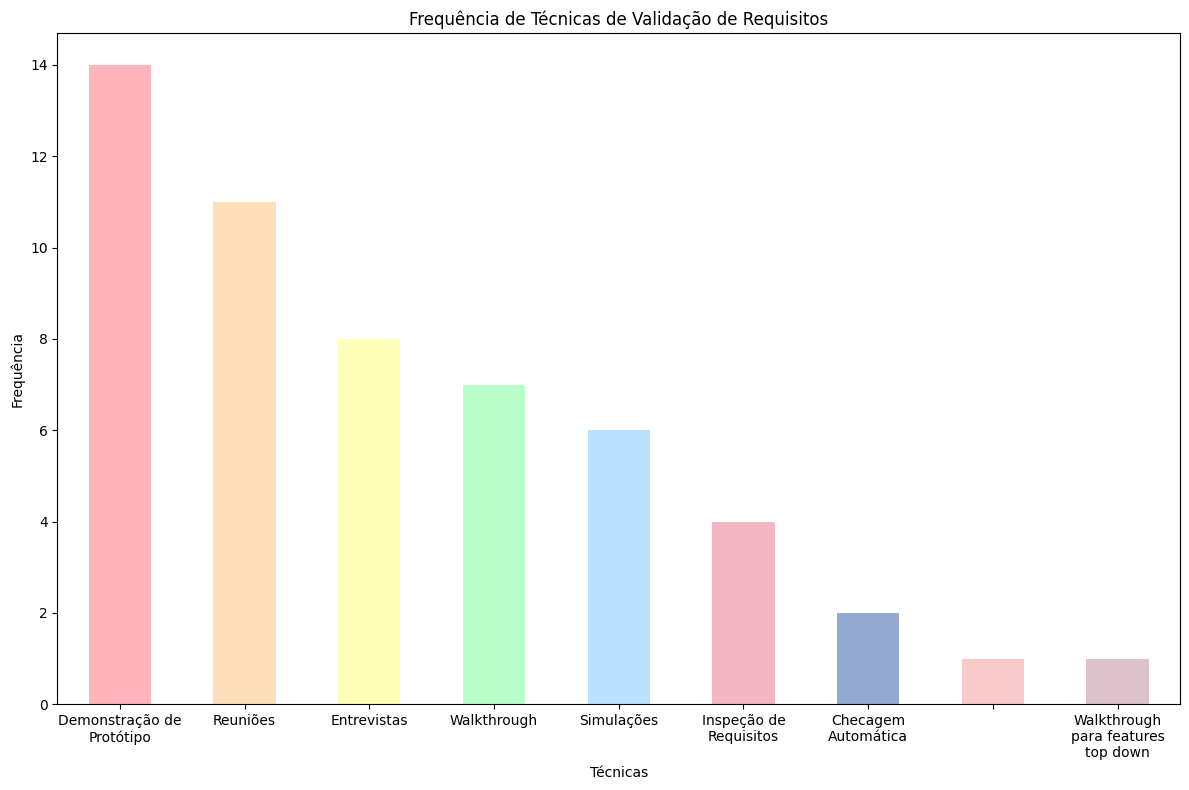

In [72]:
pastel_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff',
                 '#f4b6c2', '#92a8d1', '#f7cac9', '#dec2cb', '#e4d7e5']

color_cycle = pastel_colors * (len(validacao_contagem) // len(pastel_colors) + 1)
colors = color_cycle[:len(validacao_contagem)]

validacao_contagem_lista = list(validacao_contagem.keys())
adjusted_labels = adjust_labels(validacao_contagem_lista, max_width=15)

plt.figure(figsize=(12, 8))
validacao_contagem.plot(kind='bar', color=colors)
plt.title('Frequência de Técnicas de Validação de Requisitos')
plt.xlabel('Técnicas')
plt.ylabel('Frequência')
plt.xticks(ticks=range(len(adjusted_labels)), labels=adjusted_labels, rotation=0, ha='center')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('plots/q1/validacao.png', transparent=True)
plt.show()

#### Associações Validação

In [73]:
# Inicializar o dicionário para contar os pares
associacoes = defaultdict(lambda: defaultdict(int))

# Contar cada par em cada resposta
for tecnica in tecnicas:
    tecnica_ordenada = sorted(tecnica)
    for combinacao in combinations(tecnica_ordenada, 2):
        associacoes[combinacao[0]][combinacao[1]] += 1
        associacoes[combinacao[1]][combinacao[0]] += 1  # Contar para ambas direções

# Converter o defaultdict para um dicionário regular para facilitar a leitura
associacoes = {tecnica: dict(counts) for tecnica, counts in associacoes.items()}

# Exibir o resultado
associacoes

{'Casos de Uso': {'Histórias de Usuário': 10,
  'Linguagem Natural': 2,
  'Wireframes/Protótipos/Design Comportamental': 7,
  'DoD ': 1,
  'Fluxogramas de jornada ou de informações': 1,
  'Lista Estruturada': 1,
  'Modelagem de Processos de Negócio': 3,
  'Gherkin (BDD)': 1},
 'Histórias de Usuário': {'Casos de Uso': 10,
  'Linguagem Natural': 4,
  'Wireframes/Protótipos/Design Comportamental': 9,
  'DoD ': 1,
  'Fluxogramas de jornada ou de informações': 1,
  'Lista Estruturada': 3,
  'Modelagem de Processos de Negócio': 5,
  'Gherkin (BDD)': 1,
  'Similaridade através de imagens da própria plataforma': 1},
 'Linguagem Natural': {'Casos de Uso': 2,
  'Histórias de Usuário': 4,
  'Wireframes/Protótipos/Design Comportamental': 3,
  'Modelagem de Processos de Negócio': 1,
  'Gherkin (BDD)': 1,
  'Lista Estruturada': 1,
  'Similaridade através de imagens da própria plataforma': 1},
 'Wireframes/Protótipos/Design Comportamental': {'Casos de Uso': 7,
  'Histórias de Usuário': 9,
  'Linguage

In [74]:
# Supondo que contagem_tecnicas é uma contagem de todas as técnicas únicas
lista_tecnicas = list(tecnicas_contagem.index)
tamanho_matriz = len(lista_tecnicas)
matriz_coocorrencia = np.zeros((tamanho_matriz, tamanho_matriz))

# Criar um mapeamento de índice para as técnicas
indice_tecnica = {tecnica: i for i, tecnica in enumerate(lista_tecnicas)}

# Preencher a matriz com os dados de associação
for tecnica, associacoes in associacoes.items():
    for tecnica_associada, contagem in associacoes.items():
        if tecnica_associada in indice_tecnica:  # Garantir que a técnica associada está na lista
            i, j = indice_tecnica[tecnica], indice_tecnica[tecnica_associada]
            matriz_coocorrencia[i][j] = contagem

# Opcional: Converter a matriz para um DataFrame para uma visualização mais fácil
df_coocorrencia = pd.DataFrame(matriz_coocorrencia, index=lista_tecnicas, columns=lista_tecnicas)

# Exibir a matriz como DataFrame
df_coocorrencia

,Histórias de Usuário,Casos de Uso,Wireframes/Protótipos/Design Comportamental,Modelagem de Processos de Negócio,Linguagem Natural,Lista Estruturada,Gherkin (BDD),Fluxogramas de jornada ou de informações,DoD,Similaridade através de imagens da própria plataforma
Histórias de Usuário,0.0,10.0,9.0,5.0,4.0,3.0,1.0,1.0,1.0,1.0
Casos de Uso,10.0,0.0,7.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
Wireframes/Protótipos/Design Comportamental,9.0,7.0,0.0,3.0,3.0,3.0,2.0,1.0,1.0,1.0
Modelagem de Processos de Negócio,5.0,3.0,3.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0
Linguagem Natural,4.0,2.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
Lista Estruturada,3.0,1.0,3.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0
Gherkin (BDD),1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Fluxogramas de jornada ou de informações,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
DoD,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
Similaridade através de imagens da própria plataforma,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


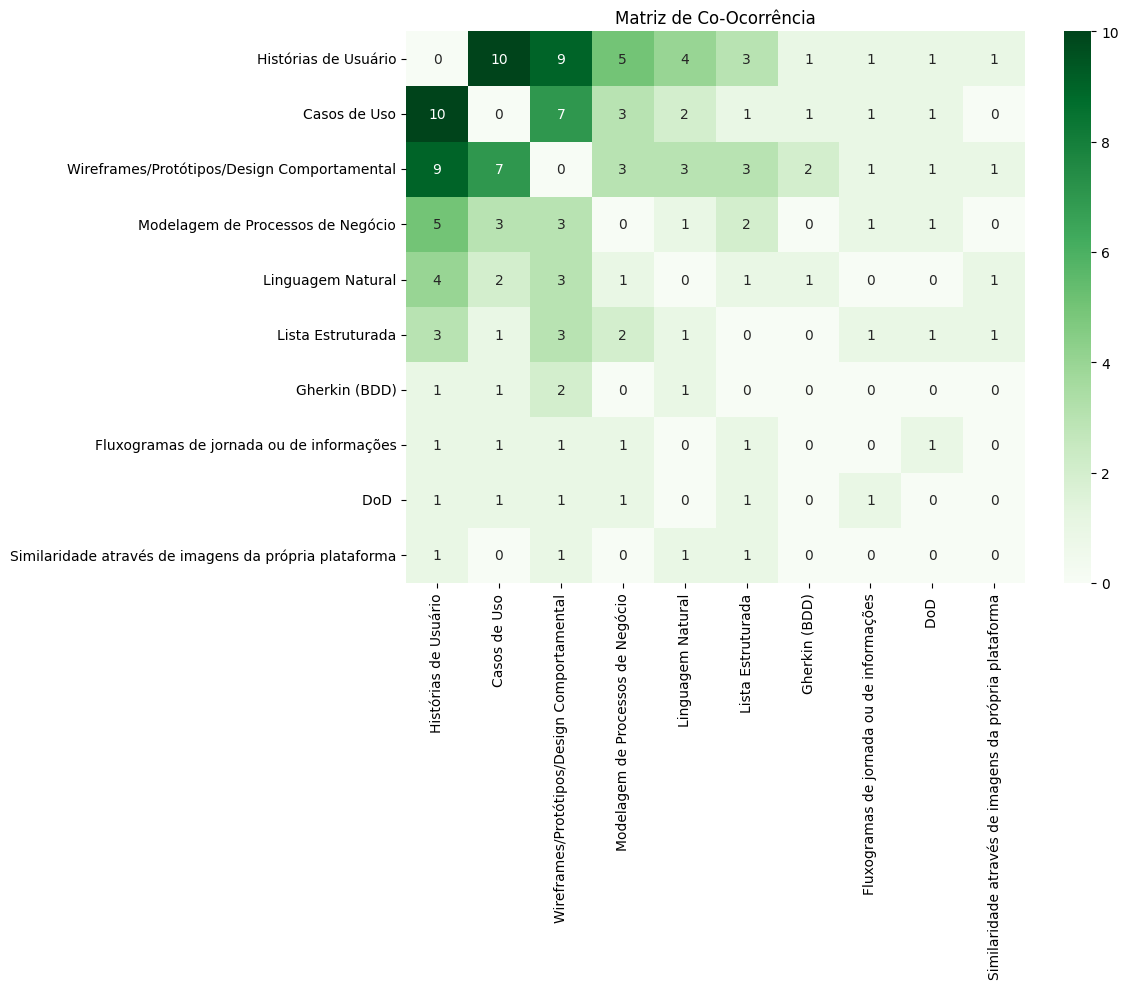

In [75]:
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_coocorrencia, annot=True, fmt=".0f", cmap="Greens", xticklabels=lista_tecnicas, yticklabels=lista_tecnicas)
plt.title("Matriz de Co-Ocorrência")
plt.tight_layout()
plt.savefig('plots/q1/heatmap_validacao.png', transparent=True)
plt.show()

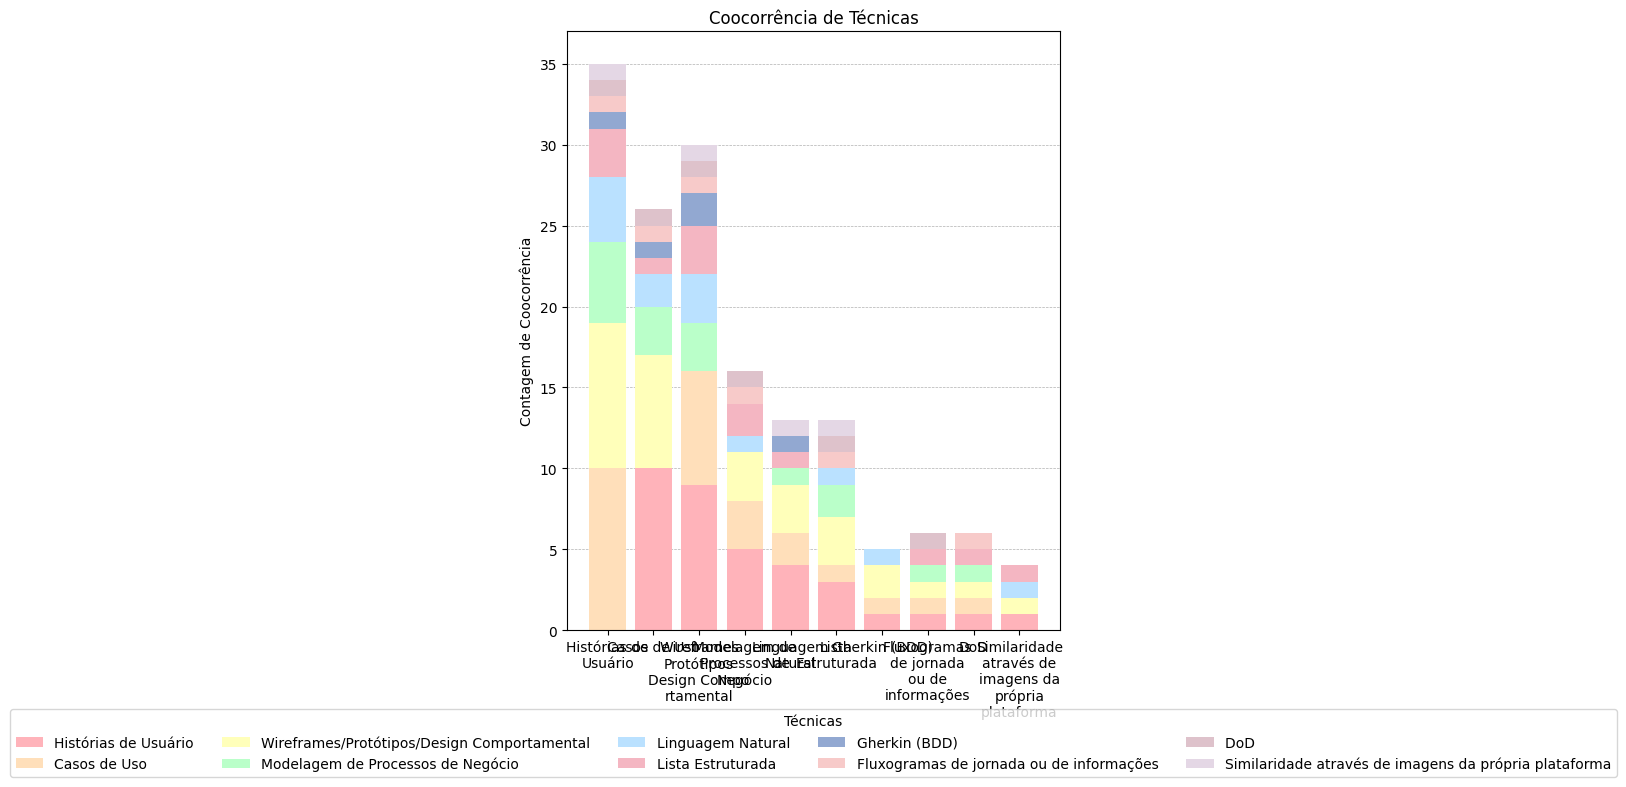

In [76]:
# Aplicação da função nos rótulos do eixo X:
xticklabels = adjust_labels(lista_tecnicas, max_width=12)  # ajuste 'max_width' conforme necessário

# Inserindo o código completo para o plot para contexto:
fig, ax = plt.subplots(figsize=(12, 8))
base = np.zeros(len(lista_tecnicas))  # base para as barras empilhadas

for i, tecnica in enumerate(lista_tecnicas):
    valores = df_coocorrencia.iloc[i, :]
    ax.bar(lista_tecnicas, valores, bottom=base, color=cores[i], label=tecnica)
    base += valores

ax.set_ylabel('Contagem de Coocorrência')
ax.set_title('Coocorrência de Técnicas')
ax.set_xticks(np.arange(len(lista_tecnicas)))
ax.set_xticklabels(xticklabels, rotation=0, ha='center')  # Horizontally align labels

ax.yaxis.grid(True, linestyle='dashed', linewidth=0.5)
ax.set_axisbelow(True)


ax.legend(title="Técnicas", loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=5)
ax.set_ylim([0, 37])
plt.tight_layout()
plt.savefig('plots/q1/coocorrencia_validacao.png', transparent=True)
plt.show()


### Alinhamento

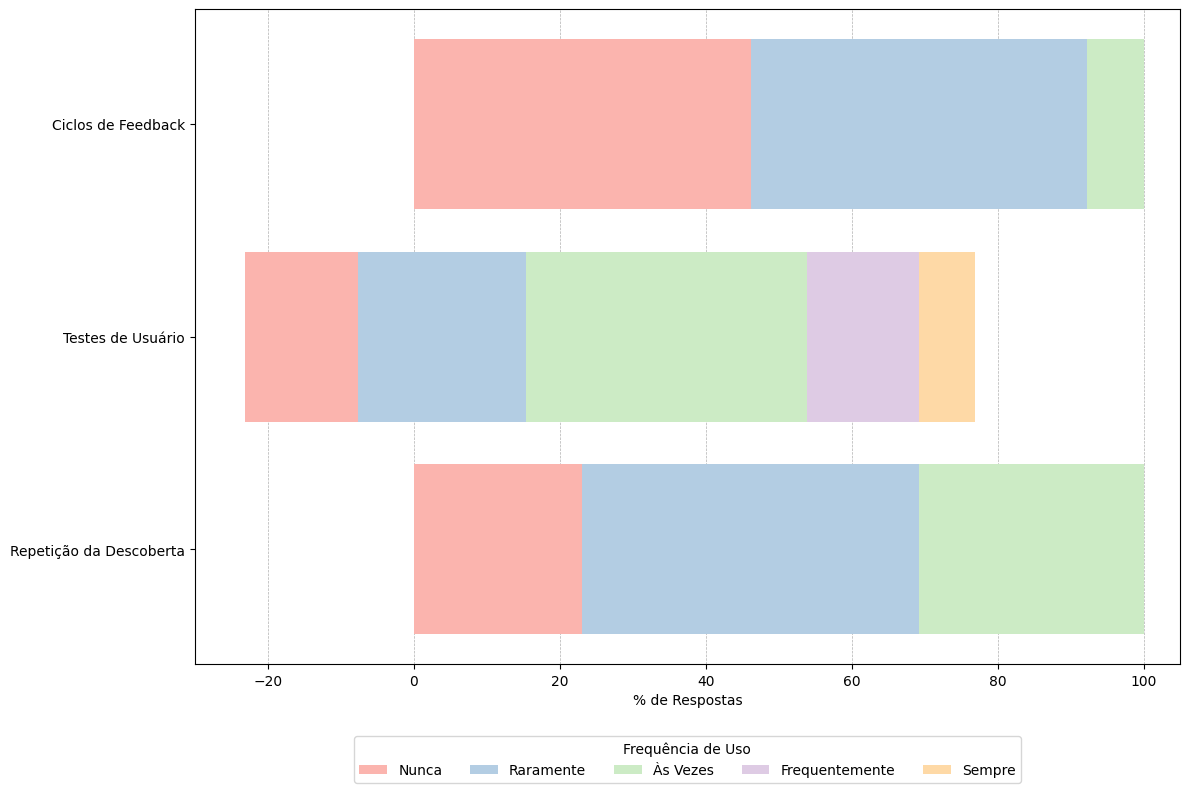

In [77]:
colunas_interesse = ['Ciclos de Feedback',
                     'Testes de Usuário',
                     'Repetição da Descoberta']
data_subset = data[colunas_interesse]

# Contando as ocorrências de cada categoria de resposta corretamente
count_data = data_subset.apply(lambda x: x.value_counts()).fillna(0).T

# Calculando porcentagens
percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Definindo as cores pastel para o gráfico
pastel_palette = sns.color_palette("Pastel1", 5)

# Preparando os dados para plotagem divergente
percentage_data['Sum_Negative'] = percentage_data.get('Nunca', 0) + percentage_data.get('Raramente', 0)
percentage_data['Sum_Positive'] = percentage_data.get('Frequentemente', 0) + percentage_data.get('Sempre', 0)
percentage_data['Left'] = -percentage_data['Sum_Negative']

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Armazenando handles para a legenda
bars = []

# Plotando cada categoria ajustando as posições
for i, category in enumerate(['Nunca', 'Raramente', 'Às Vezes', 'Frequentemente', 'Sempre'][::-1]):
    bar = ax.barh(percentage_data.index, percentage_data[category], left=percentage_data['Left'], color=pastel_palette[i])
    bars.append(bar)
    percentage_data['Left'] += percentage_data[category]

# Personalizando o gráfico
# ax.axvline(0, color='black', linewidth=0.8)  # Linha vertical em zero para referência
ax.xaxis.grid(True, linestyle='dashed', linewidth=0.5)
ax.set_axisbelow(True)
ax.set(xlim=[-30, 105], xlabel='% de Respostas')

plt.gca().invert_yaxis()  # Inverter o eixo y para ter a primeira entrada no topo

labels = ['Nunca', 'Raramente', 'Às Vezes', 'Frequentemente', 'Sempre']
ax.legend([b[0] for b in bars], labels, title="Frequência de Uso", loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

plt.tight_layout()
plt.savefig('plots/q2/divergencia_alinhamento.png', transparent=True)
plt.show()